#Q3. Classification Task on the CIFAR-10 Dataset with MLP

## Objective

1) Implement Multi Layer Perceptron (MLP) to classify images from the CIFAR-10 dataset.

2) Understand and apply Dropout layer.

3) Compare two models and explain why Dropout is useful.

##What should you do

1) Implement empty codes given.

2) Print out 4 images. (Output of Task 1~4)

3) Attach 4 images to your report. Explain your idea of Task 5 in your report.

#Preliminaries

Run the code cell and import dependencies. Check whether dependencies imported well, by printing out the version of keras.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical

print(keras.__version__)

2.15.0


Load CIFAR-10 data, normalize images and split data for training and validation.

In [ ]:
# CIFAR-10 data loading and preprocessing
(x_trainval, y_trainval), (x_test, y_test) = cifar10.load_data()
x_trainval, x_test = x_trainval / 255.0, x_test / 255.0

# Data partitioning
x_valid, x_train = x_trainval[:5000], x_trainval[5000:]
y_valid, y_train = y_trainval[:5000], y_trainval[5000:]
y_valid, y_train, y_test = to_categorical(y_valid, 10), to_categorical(y_train, 10), to_categorical(y_test, 10)

170498071/170498071 [==============================] - 6s 0us/step


Pick an arbitrary sample and check the shape of the image tensor.

In [ ]:
x_valid[0].shape

(32, 32, 3)

# Task 1 (15 points)

Build your MLP model, which should be identical to the expected output. Be sure to tag name to the each layer. (e.g. fc1, fc2, output...)

## Expected Output

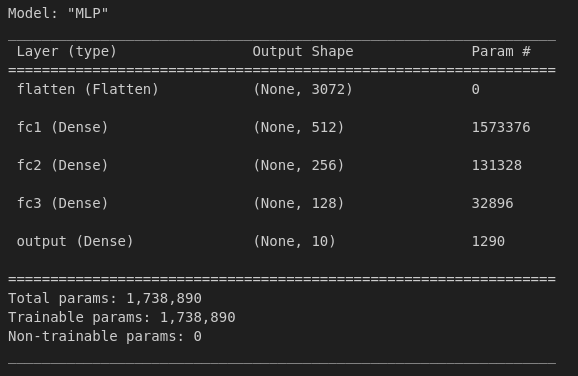

### Hint : What should be the input shape of model's first layer? You can find it in the preliminaries.

In [ ]:
##### START YOUR IMPLEMENTATION HERE #####
model = Sequential()

model.add(Flatten(input_shape=(32, 32, 3), name='flatten'))
model.add(Dense(512, activation='relu', name='fc1'))
model.add(Dense(256, activation='relu', name='fc2'))
model.add(Dense(128, activation='relu', name='fc3'))
model.add(Dense(10, activation='softmax', name='output'))

##### END YOUR IMPLEMENTATION HERE #####

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 fc1 (Dense)                 (None, 512)               1573376   
                                                                 
 fc2 (Dense)                 (None, 256)               131328    
                                                                 
 fc3 (Dense)                 (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Task 2 (15 points)

Implement the code for training.

1) When compile the model, set parameters as given:
loss = categorical cross, optimizer = Adam

2) When train the model, set parameters as given:
batch size = 64, epochs = 50

Epoch 1/50
704/704 [==============================] - 12s 10ms/step - loss: 1.8789 - accuracy: 0.3157 - val_loss: 1.7428 - val_accuracy: 0.3568
Epoch 2/50
704/704 [==============================] - 5s 7ms/step - loss: 1.6850 - accuracy: 0.3989 - val_loss: 1.7350 - val_accuracy: 0.3836
Epoch 3/50
704/704 [==============================] - 3s 4ms/step - loss: 1.5975 - accuracy: 0.4280 - val_loss: 1.6570 - val_accuracy: 0.4160
Epoch 4/50
704/704 [==============================] - 3s 4ms/step - loss: 1.5393 - accuracy: 0.4502 - val_loss: 1.5299 - val_accuracy: 0.4508
Epoch 5/50
704/704 [==============================] - 3s 5ms/step - loss: 1.5008 - accuracy: 0.4609 - val_loss: 1.5465 - val_accuracy: 0.4420
Epoch 6/50
704/704 [==============================] - 3s 4ms/step - loss: 1.4613 - accuracy: 0.4772 - val_loss: 1.5116 - val_accuracy: 0.4664
Epoch 7/50
704/704 [==============================] - 3s 4ms/step - loss: 1.4288 - accuracy: 0.4882 - val_loss: 1.5004 - val_accuracy: 0.4596
Epoc

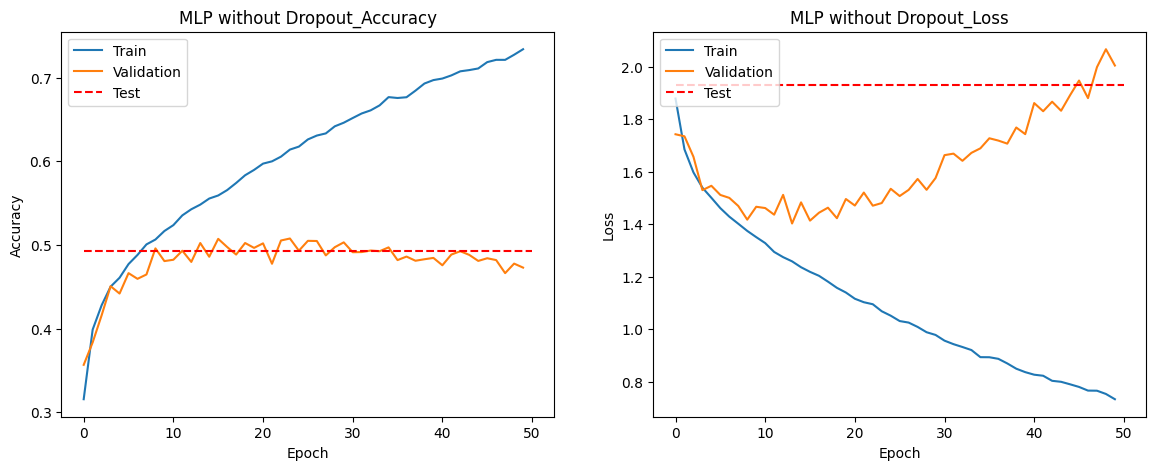

In [ ]:
##### START YOUR IMPLEMENTATION HERE #####

# 1. Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# 2. Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_valid, y_valid))

# 3. Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

##### END YOUR IMPLEMENTATION HERE #####

### Don't modify below code ###

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(np.linspace(0, 50, 10), np.full(10, test_accuracy), 'r--')
plt.title('MLP without Dropout_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(np.linspace(0, 50, 10), np.full(10, test_loss), 'r--')
plt.title('MLP without Dropout_Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')

plt.show()

#Task 3 (15 points)

This time, build your MLP model with dropout layers, which should be identical to the expected output. Be sure to tag name to the each layer. Dropout value should be 0.2.


##Expected Output

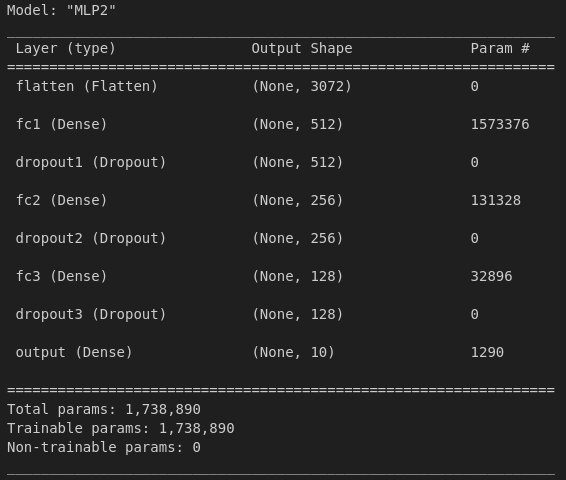



### Hint : Most implementation are almost same with task 1, except adding dropout layers.

In [ ]:
##### START YOUR IMPLEMENTATION HERE #####
model2 = Sequential()
model2.add(Flatten(input_shape=(32, 32, 3), name='flatten'))
model2.add(Dense(512, activation='relu', name='fc1'))
model2.add(Dropout(0.2, name='dropout1'))
model2.add(Dense(256, activation='relu', name='fc2'))
model2.add(Dropout(0.2, name='dropout2'))
model2.add(Dense(128, activation='relu', name='fc3'))
model2.add(Dropout(0.2, name='dropout3'))
model2.add(Dense(10, activation='softmax', name='output'))
##### END YOUR IMPLEMENTATION HERE #####

# Print model summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 fc1 (Dense)                 (None, 512)               1573376   
                                                                 
 dropout1 (Dropout)          (None, 512)               0         
                                                                 
 fc2 (Dense)                 (None, 256)               131328    
                                                                 
 dropout2 (Dropout)          (None, 256)               0         
                                                                 
 fc3 (Dense)                 (None, 128)               32896     
                                                                 
 dropout3 (Dropout)          (None, 128)              

#Task 4 (15 Points)

Similar to Task 2, compile and train your model.

1) When compile the model, set parameters as given:
loss = categorical cross, optimizer = Adam

2) When train the model, set parameters as given:
batch size = 64, epochs = 50

Epoch 1/50
704/704 [==============================] - 4s 5ms/step - loss: 2.0267 - accuracy: 0.2522 - val_loss: 1.8732 - val_accuracy: 0.3290
Epoch 2/50
704/704 [==============================] - 4s 5ms/step - loss: 1.8729 - accuracy: 0.3176 - val_loss: 1.7741 - val_accuracy: 0.3812
Epoch 3/50
704/704 [==============================] - 3s 4ms/step - loss: 1.8056 - accuracy: 0.3437 - val_loss: 1.7427 - val_accuracy: 0.3820
Epoch 4/50
704/704 [==============================] - 3s 4ms/step - loss: 1.7799 - accuracy: 0.3548 - val_loss: 1.6589 - val_accuracy: 0.4064
Epoch 5/50
704/704 [==============================] - 3s 4ms/step - loss: 1.7466 - accuracy: 0.3665 - val_loss: 1.6441 - val_accuracy: 0.4088
Epoch 6/50
704/704 [==============================] - 4s 5ms/step - loss: 1.7294 - accuracy: 0.3746 - val_loss: 1.6517 - val_accuracy: 0.4088
Epoch 7/50
704/704 [==============================] - 3s 4ms/step - loss: 1.7150 - accuracy: 0.3802 - val_loss: 1.6440 - val_accuracy: 0.4112
Epoch 

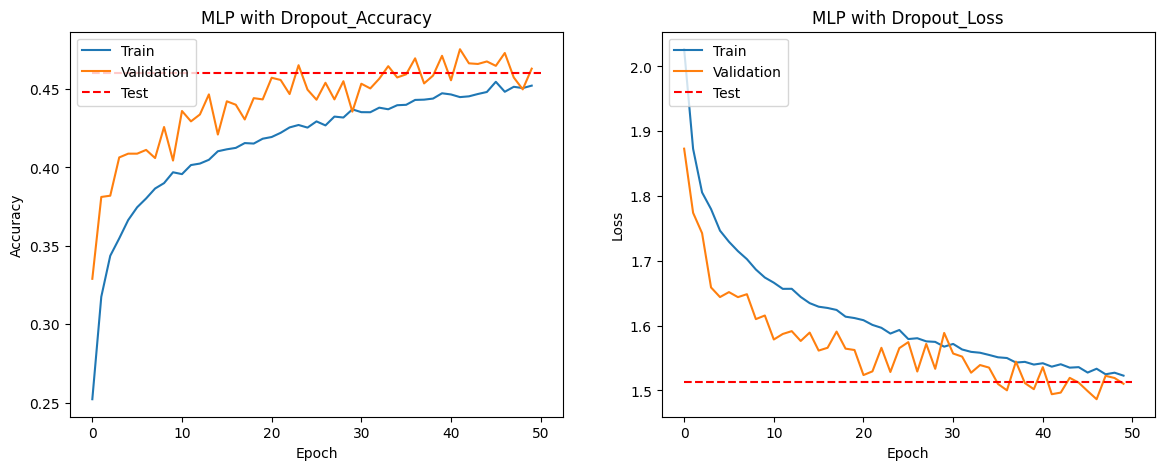

In [ ]:
##### START YOUR IMPLEMENTATION HERE #####

# 1. Compile the model
model2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# 2. Train the model
history2 = model2.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_valid, y_valid))

# 3. Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(x_test, y_test)

##### END YOUR IMPLEMENTATION HERE #####

### Don't modify below code ###

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(np.linspace(0, 50, 10), np.full(10, test_accuracy), 'r--')
plt.title('MLP with Dropout_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(np.linspace(0, 50, 10), np.full(10, test_loss), 'r--')
plt.title('MLP with Dropout_Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')

plt.show()


#Task 5 (40 Points)

Now, compare the training & test result of model1 and model2. Attach printed graph images (total 2 images, each from model1 and model2) to your report.

1) Compare the "Accuracy" graph of model1 (without dropout layer) and model2 (with dropout layer). What is the main difference? What do difference means?


2) Similarly, compare the "Loss" graph of model1 and model2. What is the main difference? Why such difference occured?


---



(Hint for both questions: Focus on the tendency of graph over epoch, and think about how dropout layer works.)

#Example Output; Your own code running result might be slightly different!

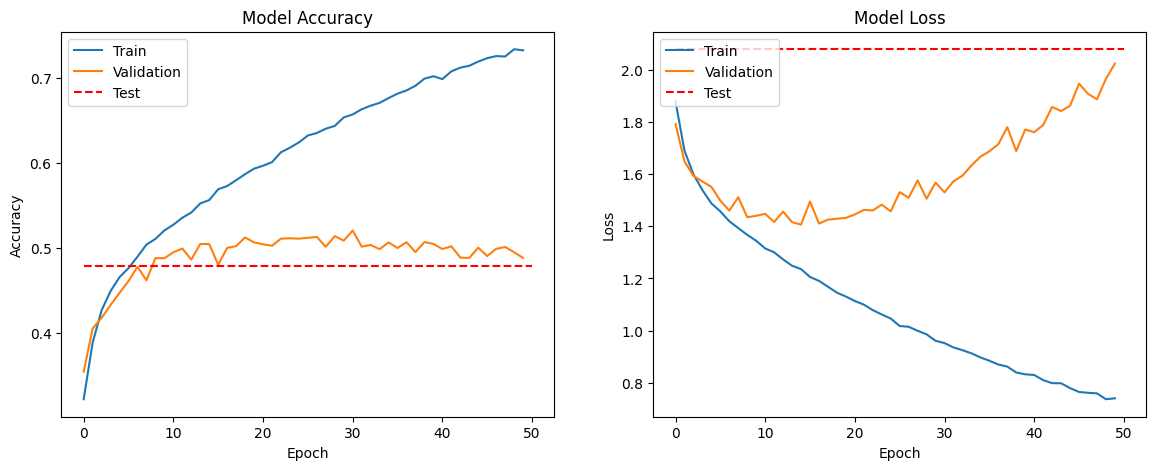

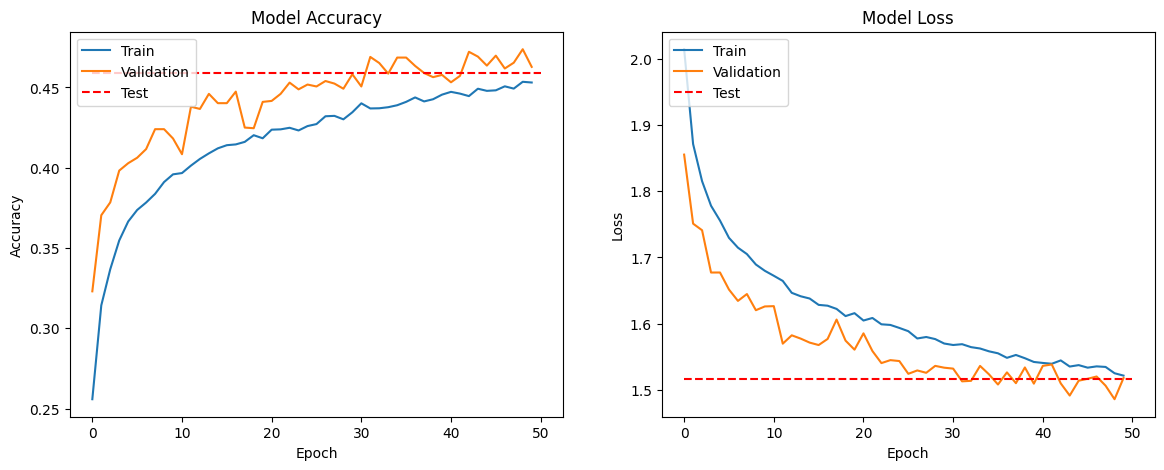